<html>
<head>
	<title></title>
</head>
<body>
<h2 style="text-align: center;line-height: 120%;">ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ «МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ» Кафедра «РЗиАЭ»</h2>
<h2 style="text-align: center;line-height: 20%;">Лабораторная работа №1</h2>

<h3 style="text-align: center;line-height: 80%;"><em>МЕТОД K-БЛИЖАЙШИХ СОСЕДЕЙ. ЛОГИСТИЧЕСКАЯ
РЕРГЕССИЯ </em></h3>

<p style="text-align: right;line-height: 40%;">Выполнил: студент группы Э-13м-19</p>

<p style="text-align: right;line-height: 40%;">Шмыков А.Д.</p>

<p style="text-align: right;line-height: 40%;">Проверил: Нухулов С.М.</p>
<h4 style="text-align: center;line-height: 100%;"><em> Москва, 2020</em></h3>
</body>
</html>

<h3> П1. Импорт библиотек, загрузка анализируемых данных csv и написание функций для вывода графиков. </h3>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
def test_train_graph(neighbors, accuracy_test, accuracy_train, graph_name1, graph_name2 ):
    plt.figure(figsize = [15,10]
    plt.plot(neighbors, accuracy_train)
    plt.plot(neighbors, accuracy_test)
    plt.grid('on')
    plt.legend([graph_name1,graph_name2])
    plt.xlabel('neigbors')
    plt.ylabel('accuracy')
def accuracy_graph(param, accuracy, param_name):
    plt.figure(figsize = [10,5])
    plt.plot(param, accuracy)
    plt.grid('on')
    plt.xlabel(param_name)
    plt.ylabel('accuracy')
data=pd.read_csv(r"C:\Users\1\Downloads\breast_cancer.csv")
#Удаление ненужных столбцов
data=data.drop(columns=['id','Unnamed: 32'])
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Выведеление диагноза из таблицы

In [2]:
X=data.drop(columns=['diagnosis'])
y=data['diagnosis']
y.head(5)

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

Если 1, то benign tumor, если 0, то malignant

In [3]:
pd.get_dummies(y)['B']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: B, Length: 569, dtype: uint8

<h3> П2. Создание выборок данных. Обучение модели ближайших соседей на обучающей выборке. </h3>

Разделение данных на обучающую и тестовые выбоки в пропорции 70(обучающих)/30(тестовых) в случайном порядке. 

X_train - данные для обучения, X_test - данные для теста (все показатели)

y_train, y_test - объект предсказания(нужно получить тип опухоли) по совокупности данных Х

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, shuffle=True)
X_train.shape
print(y_train)

1      M
212    M
562    M
383    B
271    B
      ..
48     B
556    B
533    M
453    B
301    B
Name: diagnosis, Length: 398, dtype: object


Обучение модели методом knn(k nearest neighbors). Задав число k, мы определили, сколько записей будет иметь право голоса при определении класса. Расстояние между соседями могут учитываться по формуле евлидового расстояния:
![Ttile](https://imgur.com/wQehdhB.png)

Или не учитываться (uniform) по умолчанию.


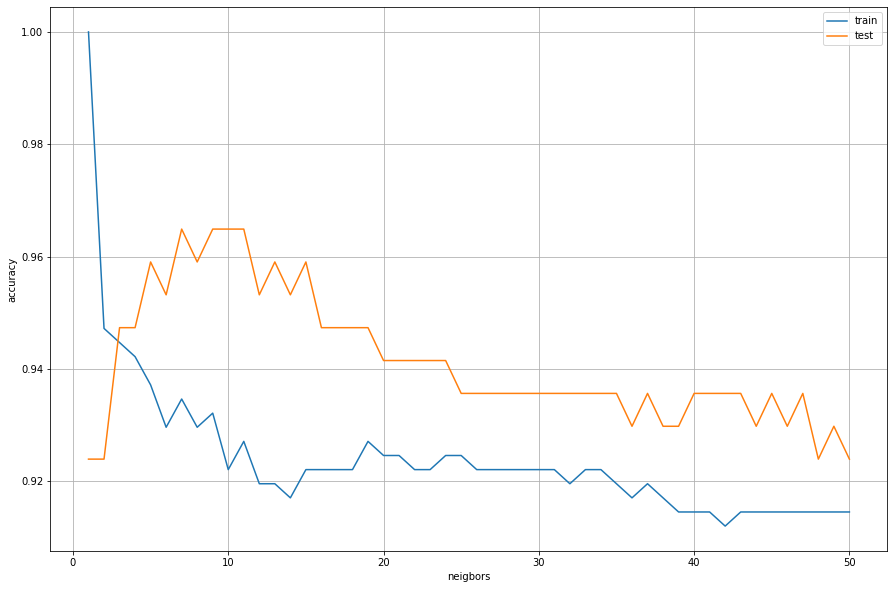

In [5]:
neighbors=range (1,51)
accuracy_train=[]
accuracy_test=[]
for x in neighbors:
    model=KNeighborsClassifier(n_neighbors=x)
    model.fit(X_train,y_train)
    accuracy_train.append( model.score(X_train,y_train))
    accuracy_test.append( model.score(X_test,y_test))
test_train_graph(neighbors,accuracy_test,accuracy_train,"train","test")

<h3> П3. Создание генератора разбиений для кросс-валидации по пяти блокам. </h3>
Число соседей k нельзя настраивать на Train(запоминание) и на Test(неприкосновенные данные).

Кросс-валидация нужна, чтоб узнать насколько успешно применяемый в модели статистический анализ способен работать на независимом наборе данных. Из K блоков один оставляется для тестирования модели, а остающиеся K-1 блока используются как тренировочные. Процесс повторяется K раз, и каждый из блоков используется один раз как тестовый. Получаются K результатов, по одному на каждый блок, они усредняются или комбинируются каким-либо другим способом, и дают одну оценку. 

In [6]:
cross_validation_accuracy=[]
kf=KFold(n_splits=5,shuffle=True)

<h3> П4.KNN с использованием кросс-валидации.</h3>

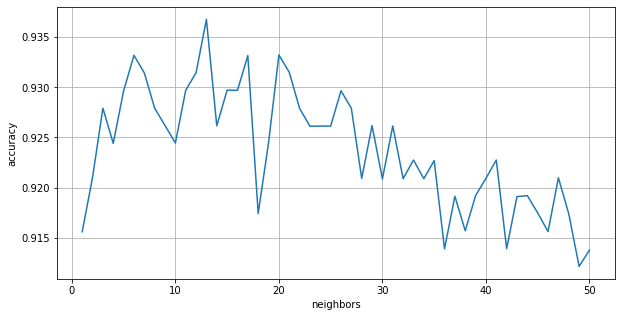

In [7]:
for k in neighbors:
    model=KNeighborsClassifier(n_neighbors=k)
    score=(cross_val_score(model, X, y, cv=kf, scoring='accuracy'))
    cross_validation_accuracy.append(score.mean())
accuracy_graph(neighbors,cross_validation_accuracy,"neighbors")

<h3> П5. Логистическая регрессия с использованием кросс-валидации.</h3> 

Идея лр - пространство исходных значений может быть разделено линейной границей на две соответствующих классам области. логистическая регрессия прогнозирует вероятность отнесения примера к классу (при условии, что мы знаем его признаки и веса модели). Механизм обучения логистической регрессии старается максимизировать среднее значение(вероятность того, что случайная точка данных будет корректно классифицирована системой, независимо от возможного класса). 

При увеличении С(обратное изменение силы регуляризации alpha) уменьшается "штраф"(добавление некоторых дополнительных ограничений к условию), чтоб уменьшить переобучение. Переобучение в большинстве случаев проявляется в том, что в получающихся многочленах слишком большие коэффициенты (построенная модель хорошо объясняет примеры из обучающей выборки, но относительно плохо работает на примерах, не участвовавших в обучении). Соответственно, необходимо добавить в целевую функцию штраф за слишком большие коэффициенты. 


Слишком большие веса-признак overfitting

C:\Games\Anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Games\Anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ex

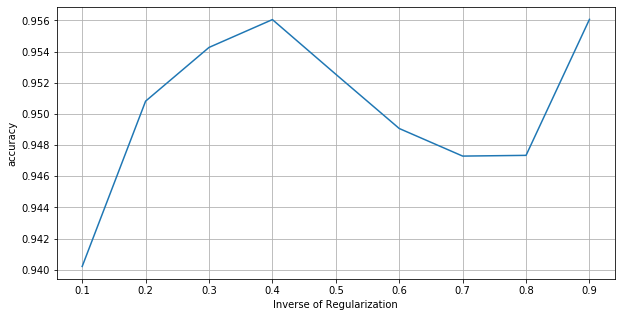

In [8]:
regression_accuracy=[]
c_range=np.arange(0.1,1,0.1)
for c in c_range:
    model_reg=LogisticRegression(C=c, max_iter=2000)
    model_reg.fit(X_train,y_train)
    score=(cross_val_score(model_reg, X, y, cv=kf, scoring='accuracy'))
    regression_accuracy.append(score.mean())
accuracy_graph(c_range,regression_accuracy,"Inverse of Regularization")

<h3> П6. Масштабирование признаков.</h3> 

Признаки измеряются в разных единицах, а значит покрывают разные диапазоны. Это сильно искажает результаты KNN алгоритма, который учитывает расстояния между измерениями. 
![Ttile](https://imgur.com/bRFB7FD.png)
z- стандартная оценка, х-значение, которое масштабируем, μ-ср.значение всех обучающих данных(X_train), σ-стандартное отклонение обучающих данных

In [9]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
# scaler.mean_
# scaler.scale_ #дисперсия

<h3> П4. KNN с использованием кросс-валидации (Scaled)</h3>

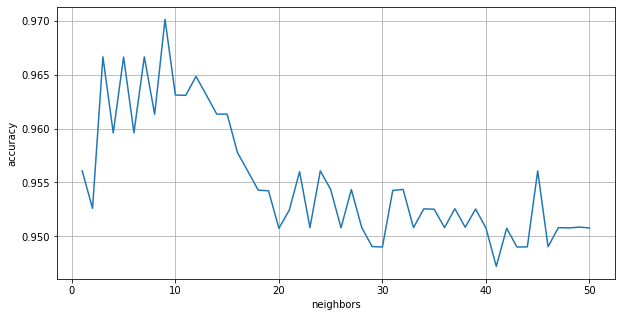

In [10]:
cross_validation_accuracy_scaled=[]
for k in neighbors:
    model=KNeighborsClassifier(n_neighbors=k)
    score=(cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy'))
    cross_validation_accuracy_scaled.append(score.mean())
accuracy_graph(neighbors,cross_validation_accuracy_scaled,"neighbors")

<h3> П5. Логистическая регрессия с использованием кросс-валидации (Scaled).</h3> 


C:\Games\Anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Games\Anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ex

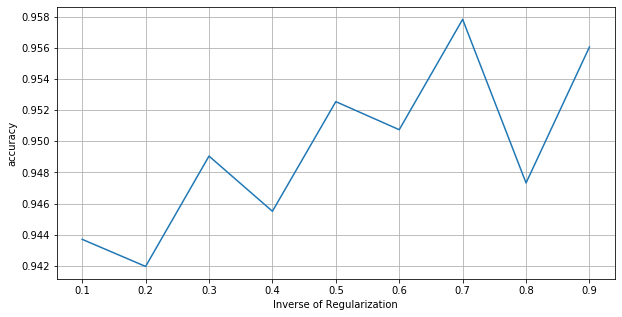

In [11]:
regression_accuracy_scaled=[]
c_range=np.arange(0.1,1,0.1)
for c in c_range:
    model_reg=LogisticRegression(C=c, max_iter=2000)
    model_reg.fit(X_train,y_train)
    score=(cross_val_score(model_reg, X, y, cv=kf, scoring='accuracy'))
    regression_accuracy_scaled.append(score.mean())
accuracy_graph(c_range,regression_accuracy_scaled,"Inverse of Regularization")

<h3>Вывод.</h3> 
В П2 точность предсказания лучше у обучающих объектов, так как алгоритм знает, к какому классу должен пренадлежать объект с этой совокупностью данных, и уже потом мы проверяем на неизвестных объектах.

Главная задача обучаемых алгоритмов – их способность обобщаться, то есть хорошо работать на новых данных. При cross-validation модель обучается на (К-1) разных подвыборок. 

Можно заметить, что после scaling результаты улучшились, так как исчезли "шумы", и все данных приведены к среднему значению.

